In [2]:
# Packages
import numpy as np
import matplotlib.pyplot as plt

In [38]:
data = np.array([0,1,2,3,4,5,6,7,8,9])      #       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
data[5]     # 5th position                          [5]
data[3:6]   # From 3rd to 5th position              [3, 4, 5]
data[:5]    # First 5                               [0, 1, 2, 3, 4]
data[5:]    # Without the first 5 (From 6th one)    [5, 6, 7, 8, 9]
data[-4]    # Fourth from behind                    [6]
data[::2]   # Every Second                          [0, 2, 4, 6, 8]
data[::-2]  # Every Second from behind              [9, 7, 5, 3, 1]
data[::-1]  # Reverse Order                         [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
np.dot([1,2,3], data[0:3][::-1])    #               Dot Product v^T * v

4

### AR(p) simulator

$X_t = c + \beta_1X_{t-1} + \beta_2X_{t-2} + ... + \beta_pX_{t-p} + \epsilon  \quad ,\epsilon \sim \mathcal{N}(0, \sigma^2)$

In [32]:
def sample_ar_process(n_samples, ar_params, noise_std = 1.0, initial_values = None):
    p = len(ar_params)

    if initial_values is None:
        initial_values = np.zeros(p)
    
    # Initial data with zero's
    data = np.zeros(n_samples)
    # First p values
    data[:p] = initial_values

    # Generate AR(p) process:
    for i in range(p, n_samples):
        noise = np.random.normal(0, noise_std)
        data[i] = np.dot(ar_params, data[i-p:i][::-1]) + noise
    return data
    

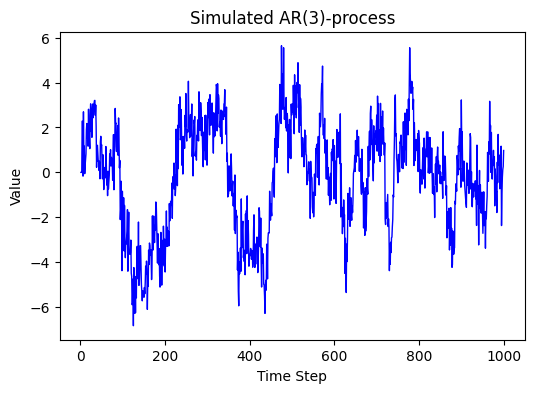

In [33]:
ar_data = sample_ar_process(n_samples = 1000, ar_params = np.array([0.33, 0.5, 0.1]))
ar_data = np.array([np.arange(1,len(ar_data)+1),ar_data])
plt.figure(figsize=(6,4))
plt.plot(ar_data[0], ar_data[1], linewidth = 1, color ='blue')
plt.title("Simulated AR(3)-process")
plt.ylabel("Value")
plt.xlabel("Time Step")
plt.show()

### SDE Simulator

$dX_t = a(X_t, t)dt + b(X_t, t)dW_t \\$

$a(X_t, t)$: Drift parameter $\\$
$b(X_t, t)$: Diffusion parameter $\\$
$W_t$: Wiener Process (Brownian motion)

To simulate data we use the **Euler-Maruyama Method**.

$X_t = X_{t-1} + a(X_{t-1}, t-1)\Delta t + b(X_{t-1}, t-1)\Delta W_{t-1} \quad \Delta W \sim \mathcal{N}(0, \Delta t)$

In [28]:
# Drift function
def a(X, t):
    return 0.2 * X
# Diffusion function
def b(X, t):
    return 0.3

def euler_maruyama(n_samples, delta_t, a, b, X0):
    X = np.zeros(n_samples)
    X[0] = X0
    for t in range(1, n_samples):
        # Wiener process
        W = np.random.normal(0, np.sqrt(delta_t))
        X[t] = X[t-1] + a(X[t-1], t*delta_t)*delta_t + b(X[t-1], t*delta_t)*W

    return X


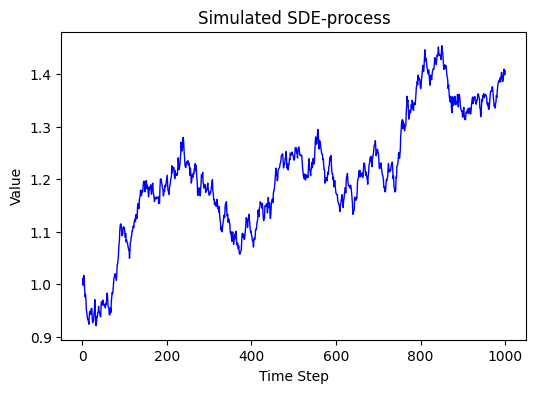

In [55]:
sde_data = euler_maruyama(n_samples = 1000, delta_t = 0.001, a = a, b = b, X0 = 1)
sde_data = np.array([np.arange(1,len(sde_data)+1),sde_data])
plt.figure(figsize=(6,4))
plt.plot(sde_data[0], sde_data[1], linewidth = 1, color ='blue')
plt.title("Simulated SDE-process")
plt.ylabel("Value")
plt.xlabel("Time Step")
plt.show()

### Preprocess Data (Creating State-Action pairs)

- **State:** Window of consequtive values from time series.
- **Action:** Next value in the time series.

- **Window size:** 10

In [56]:
def state_action_pairs(data, window):
    states = []
    actions = []

    for i in range(len(data)-window):
        state = data[i:i+window]
        action = data[i+window]
        states.append(state)
        actions.append(action)
    
    return np.array(states), np.array(actions)

states, actions = state_action_pairs(sde_data[1], window=10)

# for i in range(3):
#     print(f"State {i}: {states[i]}")
#     print(f"Action {i}: {actions[i]}")
#     print("")